# Import Libraries


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
%matplotlib inline


In [69]:
import sys
!{sys.executable} -m pip install scipy

# Reading data from csv file

In [70]:
titanic_datasets = pd.read_csv('train.csv')

In [71]:
titanic_datasets.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Renaming Columns for better understanding


In [72]:
Rename_Columns= dict()

In [73]:
Rename_Columns= {'SibSp':'SiblingsAndSpouse', 'Parch': 'ParentAndChildren' }
titanic_datasets.rename(columns=Rename_Columns, inplace = True)

In [74]:
titanic_datasets

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsAndSpouse,ParentAndChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking for null values 

In [75]:
titanic_datasets.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsAndSpouse,ParentAndChildren,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

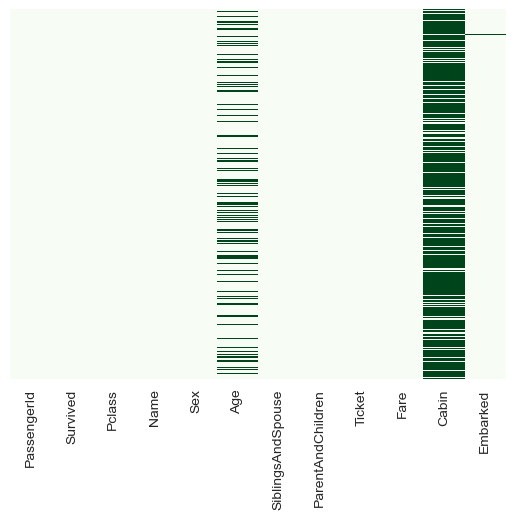

In [76]:
sns.heatmap(titanic_datasets.isnull(),yticklabels = False, cbar = False, cmap ='Greens')

# Removing Unnecessary columns and replacing null age values with mean age of the dataset and changing the datatype

In [77]:
titanic_datasets.drop('Cabin', inplace =True, axis=1)

In [78]:
titanic_datasets

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsAndSpouse,ParentAndChildren,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [79]:
mean_age= titanic_datasets['Age'].mean()

In [80]:
mean_age

29.69911764705882

In [81]:
titanic_datasets.dtypes

PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SiblingsAndSpouse      int64
ParentAndChildren      int64
Ticket                object
Fare                 float64
Embarked              object
dtype: object

In [82]:
titanic_datasets['Age'].fillna(value=mean_age, inplace=True)


In [83]:
titanic_datasets

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsAndSpouse,ParentAndChildren,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [84]:
titanic_datasets['Age']= titanic_datasets['Age'].astype('int64')


# Passengers that survived and gender of passengers that survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

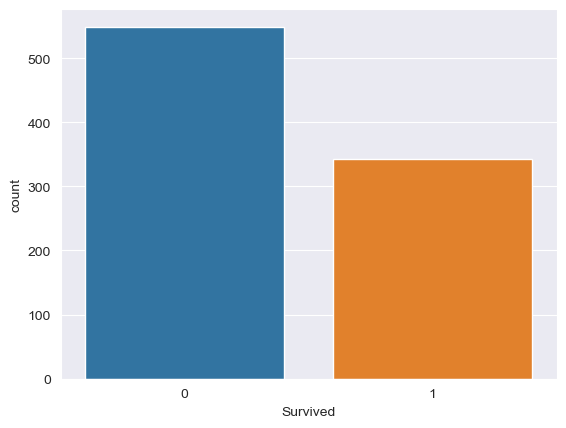

In [85]:
sns.set_style("darkgrid")
sns.countplot(x='Survived', data = titanic_datasets)

### This visual indicates that more people died 

### Hypothesis: Does Survival related to Gender
#### Null Hypothesis (H0): Survival is not related to Sex
#### Alternative Hypothesis (H1): Survival is related to Sex

In [86]:
table = pd.crosstab(titanic_datasets['Survived'],titanic_datasets['Sex'])

In [87]:
table

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

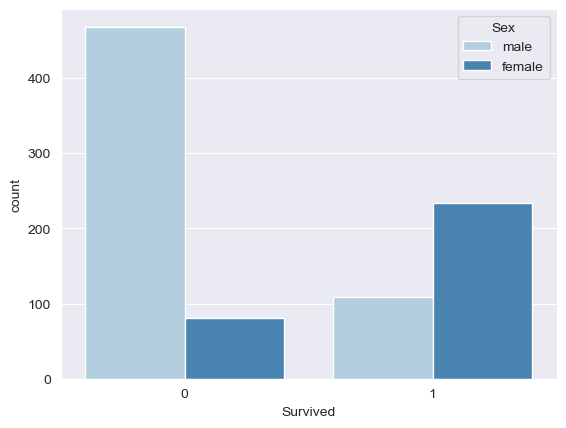

In [88]:
sns.set_style("darkgrid")
sns.countplot(x='Survived', hue='Sex',data = titanic_datasets, palette="Blues")

### This visual indicates that more men died and more females survived

In [89]:
chi2, p, dof, expected = stats.chi2_contingency(table.values)



In [90]:
chi2,p

(260.71702016732104, 1.1973570627755645e-58)

### As the P-value is less than <0.05, the probability that Gender has an impact on Survival is high. Hence, we can reject the null hypothesis.

## Age groups of people on the boat

C:\Users\v-pdeshmukh\Downloads\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

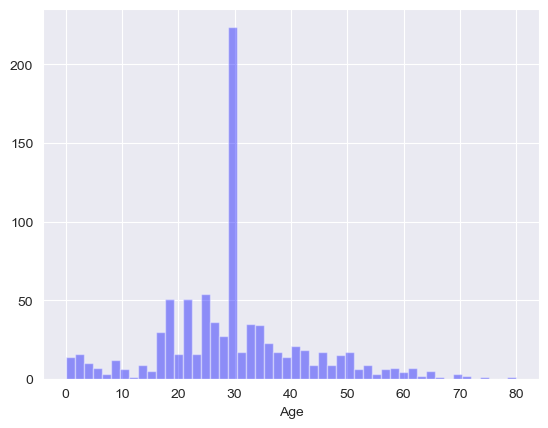

In [91]:
sns.distplot(titanic_datasets['Age'],kde = False, color = 'Blue', bins=50)

## Comparison of people travelling with Spouse or Siblings

<AxesSubplot:xlabel='SiblingsAndSpouse', ylabel='count'>

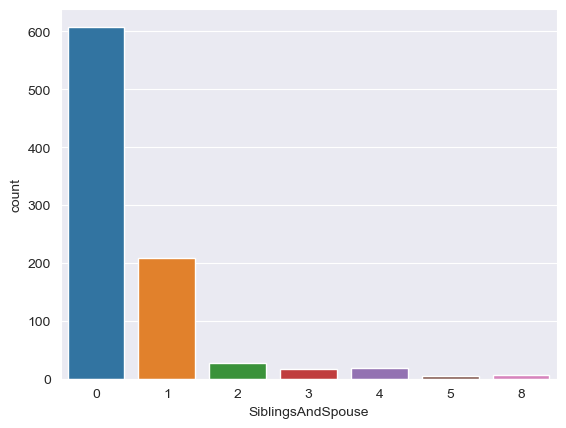

In [92]:
sns.countplot(x='SiblingsAndSpouse', data = titanic_datasets)

### Most People were travelling without a spouse or a child

### Converting from Pclass to Passenger Class for better understanding

In [93]:
def converttoclass(x):
     if x==1:
        return 'Lower Class'
     elif x==2:
        return 'Middle Class'
     elif x==3:
        return 'Higher Class'
     else:
        return 'No Class'
    
        
    

In [94]:
titanic_datasets['PassengerClass']=titanic_datasets['Pclass'].apply(converttoclass)

In [95]:
titanic_datasets

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsAndSpouse,ParentAndChildren,Ticket,Fare,Embarked,PassengerClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Higher Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Lower Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Higher Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Lower Class
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Higher Class
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,Middle Class
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Lower Class
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,Higher Class
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,Lower Class


In [96]:
titanic_datasets.drop(['Pclass','Ticket'], axis=1, inplace= True)

In [97]:
titanic_datasets

,PassengerId,Survived,Name,Sex,Age,SiblingsAndSpouse,ParentAndChildren,Fare,Embarked,PassengerClass
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Higher Class
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Lower Class
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Higher Class
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Lower Class
4,5,0,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Higher Class
...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S,Middle Class
887,888,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S,Lower Class
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,S,Higher Class
889,890,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C,Lower Class


## Comparison of Passenger Class and survival


### Hypothesis: Does Survival related to Gender
#### Null Hypothesis (H0): Survival is not related to Passenger Class
#### Alternative Hypothesis (H1): Survival is related to Passenger class

<AxesSubplot:xlabel='Survived', ylabel='count'>

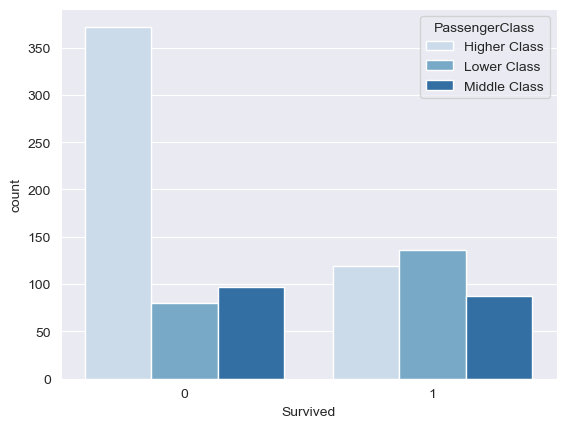

In [98]:
sns.set_style("darkgrid")
sns.countplot(x='Survived', hue='PassengerClass',data = titanic_datasets, palette="Blues")

### This figure implies that more people died who were travelling in the higher class

In [99]:
table = pd.crosstab(titanic_datasets['PassengerClass'],titanic_datasets['Survived'])

In [100]:
table

Survived,0,1
PassengerClass,,
Higher Class,372,119
Lower Class,80,136
Middle Class,97,87


In [101]:
chi2, p, dof, expected = stats.chi2_contingency(table.values)

In [102]:
chi2,p

(102.88898875696057, 4.5492517112987287e-23)

### As the P-value is less than <0.05, the probability that PassengerClass has an impact on Survival is high. Hence, we can reject the null hypothesis.

## Comparison of age and Passenger class

<AxesSubplot:xlabel='PassengerClass', ylabel='Age'>

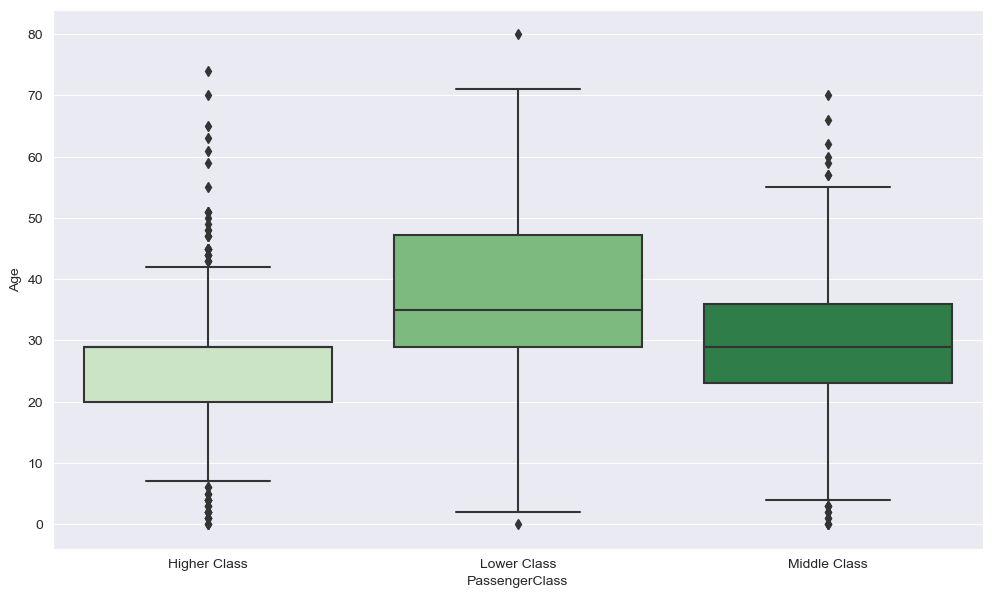

In [209]:
plt.figure(figsize=(12,7))
sns.boxplot(x='PassengerClass', y='Age', data= titanic_datasets, palette ='Greens')

## Correlations between the data


In [211]:
correlation_data=titanic_datasets.corr(method='pearson')

<AxesSubplot:>

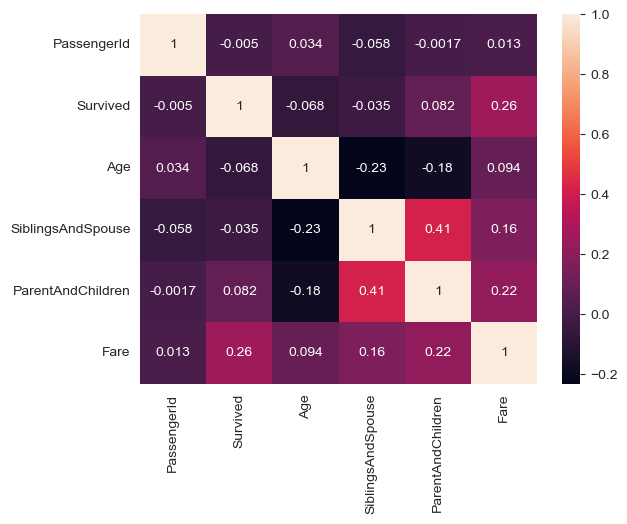

In [212]:
sns.heatmap(correlation_data,annot =True)